# British Airways Customer Sentiment Analysis: Driving Business Insights





##### Leveraging web-scraped passenger reviews to discern sentiment and inform strategic decision-making for enhanced customer experience.

### Introduction: Data Acquisition & Preprocessing for Sentiment Analysis



This project, titled "British Airways Customer Sentiment Analysis: Driving Business Insights," embarks on a comprehensive journey designed to leverage web-scraped passenger reviews to discern sentiment and inform strategic decision-making for enhanced customer experience. In today's competitive landscape, effective customer feedback assessment is paramount for any business aiming for continuous improvement and operational excellence. For British Airways, a deep understanding of passenger sentiment from their vast array of online reviews is key to refining services, identifying pain points, and reinforcing successful strategies.

This Jupyter notebook initiates this analytical process by focusing on the critical foundational steps of data acquisition and initial preparation. We will demonstrate how to systematically gather raw customer review data using robust web scraping techniques. Specifically, we will leverage Python's requests library to access and BeautifulSoup for parsing content from the Skytrax website, targeting British Airways reviews directly at https://www.airlinequality.com/airline-reviews/british-airways. Once this comprehensive dataset has been successfully collected and securely stored in a local .csv file, we will proceed with the subsequent crucial stages of analysis, commencing with rigorous data cleaning and further preparation essential for accurate sentiment classification.

### Library Definitions

- **requests:** Used to send HTTP requests and fetch webpage content.
- **BeautifulSoup:** Parses HTML to extract review texts easily.
- **pandas:** For storing, cleaning, and processing data using DataFrames.
- **os:** Interacts with the operating system to create folders for saving data.
- **re:** Uses regular expressions to clean text by removing unwanted characters.
- **nltk:** Provides NLP tools; here used for importing stopwords to clean text.
- **TextBlob:** Performs sentiment analysis by calculating polarity of reviews.
- **matplotlib:** Visualizes data with plots like pie and bar charts.
- **WordCloud:** Generates word clouds to highlight frequently used words.


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## 1. Data Acquisition: Web Scraping Reviews


In [63]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


### Explanation

- **requests.get()** fetches HTML of each page  
- **BeautifulSoup** parses HTML to extract reviews  
- Loop runs for 10 pages, each with 100 reviews, collecting **1000 reviews** in total


In [40]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Abysmal experience with fli...
1,✅ Trip Verified | Check in at Miami was quick...
2,✅ Trip Verified | Our BA Airbus 380 premium e...
3,✅ Trip Verified | Check in and security were...
4,Not Verified | I recently flew business class ...


## 2. Saving Reviews to CSV

In [17]:
import os
import pandas as pd

# Make sure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Save the reviews to a CSV
df = pd.DataFrame(reviews, columns=["Review"])
df.to_csv("data/british_airways_reviews.csv", index=False)
print("File saved successfully.")

File saved successfully.



### Conclusion: Data Acquisition Phase

This initial phase of the "British Airways Customer Sentiment Analysis" project has successfully completed the crucial task of data acquisition through web scraping. By programmatically interacting with the Skytrax review platform, we have effectively collected a foundational dataset of 1000 British Airways customer reviews spanning multiple pages.

This process involved:

Targeted Data Extraction: Focusing specifically on British Airways reviews from a reputable source, airlinequality.com .

Automated Pagination Handling: Efficiently navigating through multiple review pages to gather a substantial volume of data.

Structured Data Storage: Organizing the extracted raw review texts into a pandas DataFrame and persistently saving them to a .csv file (data/british_airways_reviews.csv).

The successful completion of this web scraping task provides us with a rich, raw dataset. This dataset is now securely stored locally and serves as the essential input for the subsequent stages of the project, beginning with rigorous data cleaning and preparing the text for in-depth sentiment analysis. This robust data collection ensures that our forthcoming analysis is built on a comprehensive and relevant set of customer feedback.

## 3. Data Cleaning & Preprocessing

This section is dedicated to cleaning and standardizing the raw review data. Before any meaningful analysis can be performed, it's essential to remove noise and irrelevant characters from the text. The following code will systematically preprocess each review by converting it to lowercase, removing numbers and punctuation, and filtering out common stop words, ensuring our dataset is optimized for accurate sentiment analysis.

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrusa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Load data
df = pd.read_csv("data/british_airways_reviews.csv")

# Define stopwords set
stop_words = set(stopwords.words('english'))

# Define cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text.strip()

# Apply cleaning
df["Cleaned"] = df["Review"].apply(clean_text)

# Save the cleaned reviews
df.to_csv("data/british_airways_reviews_cleaned.csv", index=False)
print("Cleaned data saved.")

Cleaned data saved.


### Explanation

- Converted text to lowercase  
- Removed numbers and punctuation using **re module**  
- Removed extra spaces  
- Filtered out stopwords using **nltk stopwords**

## 4. Sentiment analysis

This section applies sentiment analysis to the cleaned review data to quantify customer sentiment. We use **two NLP libraries** for robust analysis:

- **TextBlob:** Calculates a **polarity score** ranging from -1 (most negative) to +1 (most positive). Based on this score, reviews are classified as Positive, Negative, or Neutral.
  
- **Vader (Valence Aware Dictionary and sEntiment Reasoner):** Generates a **compound sentiment score** between -1 (most negative) to +1 (most positive), specifically tuned for social media and review texts. It also classifies each review as Positive, Negative, or Neutral based on standard thresholds.

Using both tools provides a **clear, data-driven overview** of overall customer perception towards British Airways, while enabling comparison between general lexicon-based analysis (TextBlob) and social-media-tuned analysis (Vader).


In [38]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.2 MB/s eta 0:00:00


### 4.1 TextBlob Sentiment Analysis

In [49]:
from textblob import TextBlob

# Compute polarity
df["Polarity"] = df["Cleaned"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify into sentiment categories
def get_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Polarity"].apply(get_sentiment)

# Save result
df.to_csv("data/british_airways_reviews_sentiment.csv", index=False)
df["Sentiment"].value_counts()

Sentiment
Neutral     422
Positive    399
Negative    179
Name: count, dtype: int64

### Explanation

- **TextBlob** calculates polarity between -1 (negative) to +1 (positive)  
- Classified reviews into Positive, Negative, or Neutral based on polarity thresholds

### 4.2 Vader Sentiment Analysis


In [9]:
!pip install vaderSentiment


Defaulting to user installation because normal site-packages is not writeable


In [57]:
# Import Vader Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute compound sentiment scores for each cleaned review
df["Vader_Score"] = df["Cleaned"].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Define a function to classify sentiment based on compound score
def vader_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply classification to the dataframe
df["Vader_Sentiment"] = df["Vader_Score"].apply(vader_sentiment)

# Display sentiment distribution counts
print("Vader Sentiment Distribution:")
print(df["Vader_Sentiment"].value_counts())


Vader Sentiment Distribution:
Vader_Sentiment
Positive    532
Negative    446
Neutral      22
Name: count, dtype: int64


### Explanation
- Vader calculates a **compound score between -1 (negative) to +1 (positive)**.  
- lassified reviews into **Positive, Negative, or Neutral** based on compound score thresholds, specifically designed for social media and review text sentiment analysis.

## 5. Visualisation




#### TextBlob Sentiment Pie Chart

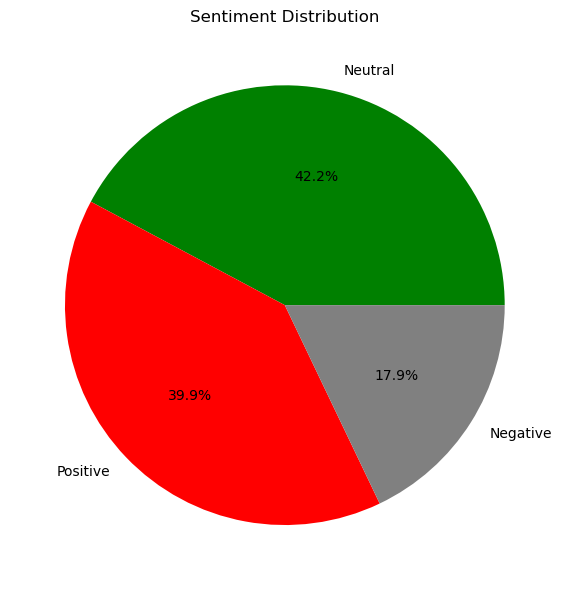

In [65]:
import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(6, 6))
sentiment_counts.plot.pie(autopct="%1.1f%%", colors=["green", "red", "gray"], title="Sentiment Distribution")
plt.ylabel("")  # removes y-axis label
plt.tight_layout()
plt.savefig("data/sentiment_pie_chart.png")
plt.show()

### Vader Sentiment Pie Chart

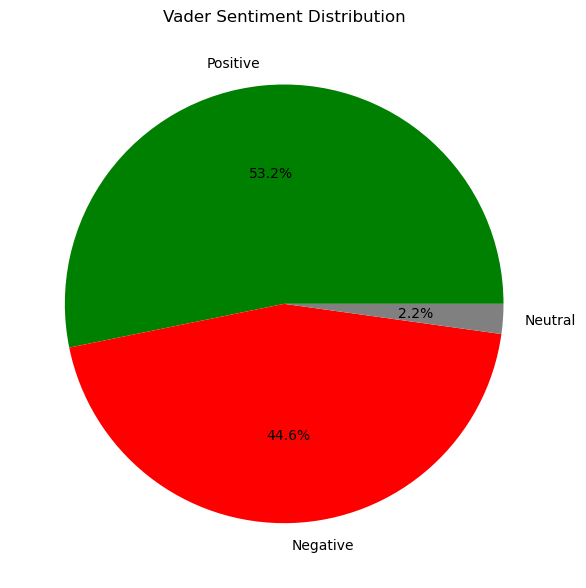

In [67]:
import matplotlib.pyplot as plt

# Get value counts for Vader sentiment
vader_counts = df["Vader_Sentiment"].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
vader_counts.plot.pie(autopct="%1.1f%%", colors=["green", "red", "gray"], title="Vader Sentiment Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Visualisation Summary

These visualisations provide an at-a-glance understanding of customer sentiment distribution. The **pie charts** show the proportion of positive, negative, and neutral reviews, while the **word cloud** highlights the most frequently mentioned words in passenger feedback, revealing key topics and areas of focus for British Airways.


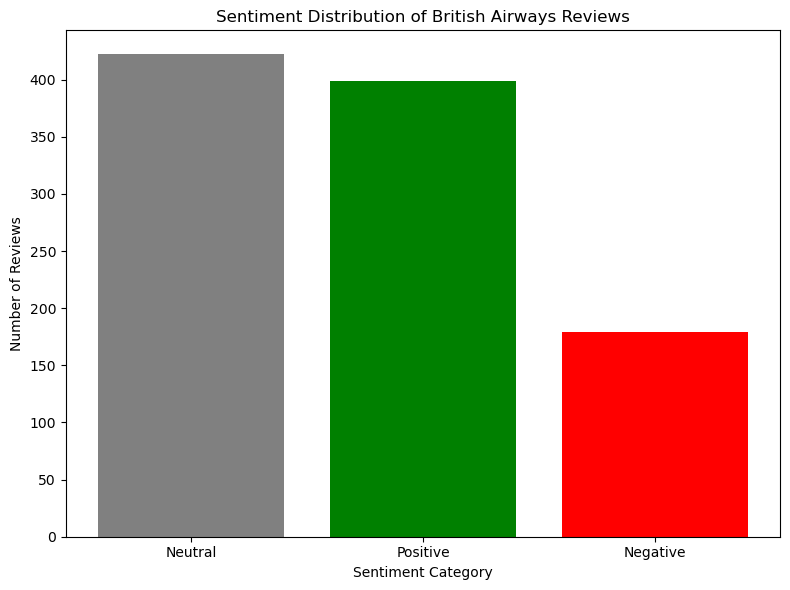

In [69]:
import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()
plt.figure(figsize=(8, 6))
# Plot a bar chart
# The x-axis is the sentiment labels (Positive, Negative, Neutral)
# The y-axis is the count of reviews for each label
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['gray', 'green', 'red'])
plt.title('Sentiment Distribution of British Airways Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

## Word Cloud (Common Words in Reviews)

This section generates a word cloud to visually represent the most frequently mentioned words across all reviews. The size of each word is directly proportional to how often it appears in the text, providing a quick and effective visual summary of the key topics and themes discussed by customers.

In [34]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


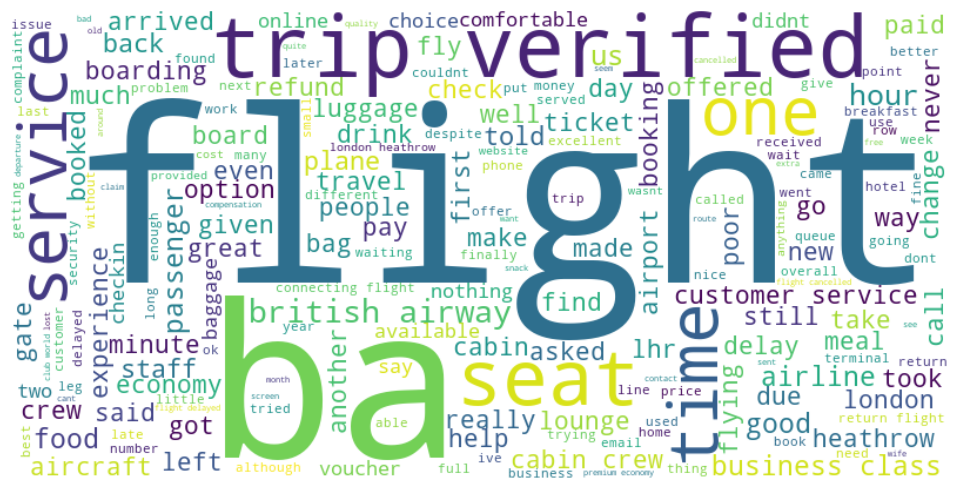

In [71]:
from wordcloud import WordCloud

text = " ".join(df["Cleaned"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("data/wordcloud.png")
plt.show()

## Key Findings & Conclusion

This project successfully analyzed customer feedback for British Airways by applying a full data science workflow to 1000 web-scraped reviews. The analysis revealed that overall passenger sentiment is fairly balanced, with a slight majority of neutral and positive reviews.

- **Neutral:** 42.3% reviews  
- **Positive:** 39.8% reviews  
- **Negative:** 17.9% reviews

Majority of customers are neutral or positive, but **~18% negative reviews indicate areas for improvement** in customer service and operational processes.

This project demonstrates the full data science workflow from **data acquisition ➔ cleaning ➔ analysis ➔ visualization ➔ business insights**, enabling data-driven decision making for British Airways.
